### `Q-1:` Write a program to create an empty series.

In [38]:
# code here
import pandas as pd
import numpy as np

pd.Series()

Series([], dtype: object)

### `Q-2:` Write a Pandas program to add, subtract, multiple and divide two Pandas Series.

In [39]:
# code here
a = pd.Series([1, 2, 4])
b = pd.Series([5, 4, 2])

print(a + b)

0    6
1    6
2    6
dtype: int64


In [40]:
print(a - b)

0   -4
1   -2
2    2
dtype: int64


In [41]:
print(a * b)

0    5
1    8
2    8
dtype: int64


In [42]:
print(a - b)

0   -4
1   -2
2    2
dtype: int64


### `Q-3` Write a Pandas program to compare the elements of the two Pandas Series.
Sample Series: [2, 4, 6, 8, 10], [1, 3, 5, 7, 10]



In [43]:
# code here
a = pd.Series([1, 2, 3, 4])
b = pd.Series([7, 8, 3, 4])

print(a > b)

0    False
1    False
2    False
3    False
dtype: bool


In [44]:
print(a == b)

0    False
1    False
2     True
3     True
dtype: bool


In [45]:
print(a < b)

0     True
1     True
2    False
3    False
dtype: bool


### `Q-5.`Write a function to change the data type of given a column or a Series. Function takes series and data type as input, returns the converted series.
```
series = pd.Series([1,2,'Python', 2.0, True, 100])
change to float type data
```
Note: Read about pd.to_numeric()

In [46]:
# code here
series = pd.Series([1, 2, 'Python', 2.0, True, 100])
pd.to_numeric(series, errors='coerce')

0      1.0
1      2.0
2      NaN
3      2.0
4      1.0
5    100.0
dtype: float64

Download data - https://drive.google.com/file/d/1LRhXwbEodeWXtzPhJCX0X9Lf_BECzvqb/view?usp=share_link
All Batsman runs series in IPL 2008 to 2022.

Below questions are based on this data.

### `Q-6` Find top 10 most run getter from the series.

In [47]:
# code here
batsman = pd.read_csv('session_17_and_18/batsman_runs_ipl.csv')
batsman

,batter,batsman_run
0,A Ashish Reddy,280
1,A Badoni,161
2,A Chandila,4
3,A Chopra,53
4,A Choudhary,25
...,...,...
600,Yash Dayal,0
601,Yashpal Singh,47
602,Younis Khan,3
603,Yuvraj Singh,2754


In [48]:
batsman.sort_values('batsman_run', ascending=False).head(10)

,batter,batsman_run
569,V Kohli,6634
462,S Dhawan,6244
130,DA Warner,5883
430,RG Sharma,5881
493,SK Raina,5536
27,AB de Villiers,5181
108,CH Gayle,4997
339,MS Dhoni,4978
452,RV Uthappa,4954
256,KD Karthik,4377


### `Q-7` No of players having runs above 3000

In [49]:
# code here
batsman[batsman['batsman_run'] > 3000].shape[0]

20

### `Q-8` No of players having runs above mean value?

In [50]:
# code here
batsman[batsman['batsman_run'] > np.mean(batsman['batsman_run'])].shape[0]

128

Download data - https://drive.google.com/file/d/1QZuZ5bypUInfVvarHACLAi8tXXHvb8xd/view?usp=share_link

file name - items.csv



### `Q-9`


In [51]:
#     1 Read `items.csv` making `item_name` as index.
#     
#     2 Show no of nan values
#     
#     3 Item price is given in $, so convert it to rupees without currency symbol.
# 
#     4 Make data type of newly made series as float.
# 
#     5 Fill nan with mean of the series
# 
# 
# 
# How csv file looks
# 
# ```
# item_name	item_price
# Chips and Fresh Tomato Salsa	$2.39
# Izze	$3.39
# Nantucket Nectar	$3.39
# Chips and Tomatillo-Green Chili Salsa	$2.39
# Chicken Bowl	$16.98
# 
# ```

In [52]:
# code here
# i.
items = pd.read_csv('items.csv', index_col=['item_name']).squeeze("columns")
print(items)
print(items.shape)

item_name
Chips and Fresh Tomato Salsa              $2.39 
Izze                                      $3.39 
Nantucket Nectar                          $3.39 
Chips and Tomatillo-Green Chili Salsa     $2.39 
Chicken Bowl                             $16.98 
                                          ...   
Steak Burrito                            $11.75 
Steak Burrito                            $11.75 
Chicken Salad Bowl                       $11.25 
Chicken Salad Bowl                        $8.75 
Chicken Salad Bowl                        $8.75 
Name: item_price, Length: 4622, dtype: object
(4622,)


In [53]:
# ii.
items.isnull().sum()
# both correct
items.isna().sum()

50

In [54]:
# iii.
def rupees(x):
    try:
        y = x[1:]
    except:
        y = x
    return float(y) * 83.50


items.apply(rupees)

item_name
Chips and Fresh Tomato Salsa              199.565
Izze                                      283.065
Nantucket Nectar                          283.065
Chips and Tomatillo-Green Chili Salsa     199.565
Chicken Bowl                             1417.830
                                           ...   
Steak Burrito                             981.125
Steak Burrito                             981.125
Chicken Salad Bowl                        939.375
Chicken Salad Bowl                        730.625
Chicken Salad Bowl                        730.625
Name: item_price, Length: 4622, dtype: float64

In [55]:
# iii.
items.str.split('$').str.get(1).str.strip().apply(lambda x: float(x) * 83.50 if type(x) is str else None)

item_name
Chips and Fresh Tomato Salsa              199.565
Izze                                      283.065
Nantucket Nectar                          283.065
Chips and Tomatillo-Green Chili Salsa     199.565
Chicken Bowl                             1417.830
                                           ...   
Steak Burrito                             981.125
Steak Burrito                             981.125
Chicken Salad Bowl                        939.375
Chicken Salad Bowl                        730.625
Chicken Salad Bowl                        730.625
Name: item_price, Length: 4622, dtype: float64

In [56]:
items.apply(lambda x: float(x[1:]) * 83.50 if type(x) == str else None)

item_name
Chips and Fresh Tomato Salsa              199.565
Izze                                      283.065
Nantucket Nectar                          283.065
Chips and Tomatillo-Green Chili Salsa     199.565
Chicken Bowl                             1417.830
                                           ...   
Steak Burrito                             981.125
Steak Burrito                             981.125
Chicken Salad Bowl                        939.375
Chicken Salad Bowl                        730.625
Chicken Salad Bowl                        730.625
Name: item_price, Length: 4622, dtype: float64

In [57]:
# iv.
items = items.apply(rupees)
items

item_name
Chips and Fresh Tomato Salsa              199.565
Izze                                      283.065
Nantucket Nectar                          283.065
Chips and Tomatillo-Green Chili Salsa     199.565
Chicken Bowl                             1417.830
                                           ...   
Steak Burrito                             981.125
Steak Burrito                             981.125
Chicken Salad Bowl                        939.375
Chicken Salad Bowl                        730.625
Chicken Salad Bowl                        730.625
Name: item_price, Length: 4622, dtype: float64

In [58]:
# V.
items.fillna(items.mean())

item_name
Chips and Fresh Tomato Salsa              199.565
Izze                                      283.065
Nantucket Nectar                          283.065
Chips and Tomatillo-Green Chili Salsa     199.565
Chicken Bowl                             1417.830
                                           ...   
Steak Burrito                             981.125
Steak Burrito                             981.125
Chicken Salad Bowl                        939.375
Chicken Salad Bowl                        730.625
Chicken Salad Bowl                        730.625
Name: item_price, Length: 4622, dtype: float64

### `Q-10`:
    i. Find mean price
    ii. Find 30th and 6th percentile value
    iii. Plot Histogram on price with bin size 50
    iv. No of items price lies between [1000 to 2000]



In [59]:
# code here
# i. 
items.mean()

623.1631299212597

In [60]:
# ii.
items.quantile(0.3)

371.575

In [61]:
items.quantile(0.06)

104.375

<Axes: ylabel='Frequency'>

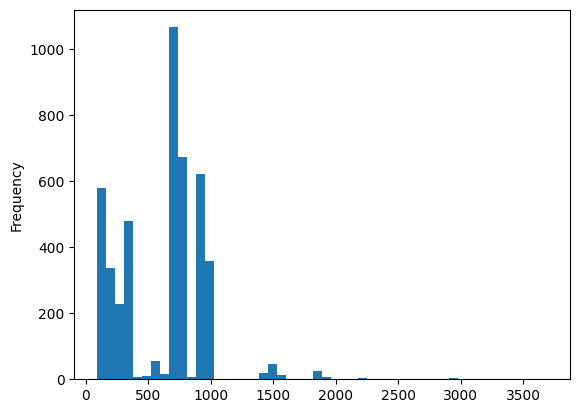

In [62]:
# iii.
items.plot.hist(bins=50)

<Axes: ylabel='Frequency'>

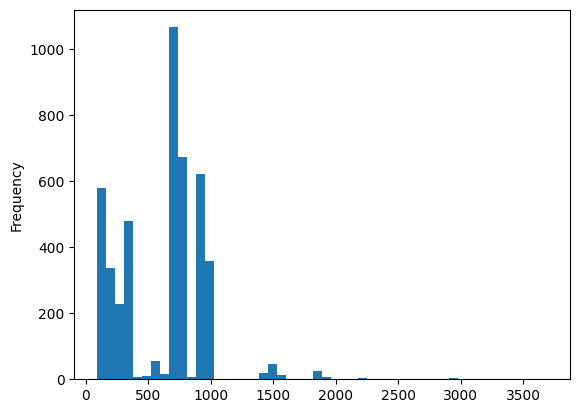

In [64]:
items.plot(kind='hist', bins = 50)

In [65]:
# iv.
items[(items > 1000) & (items < 2000)]

item_name
Chicken Bowl           1417.83
Chicken Salad Bowl     1878.75
Steak Burrito          1501.33
Chicken Burrito        1461.25
Chicken Bowl           1461.25
                        ...   
Chicken Bowl           1878.75
Steak Bowl             1962.25
Chicken Bowl           1461.25
Chips and Guacamole    1486.30
Chicken Salad Bowl     1461.25
Name: item_price, Length: 116, dtype: float64